![logo](../Data/JFM-notebooks-logo.jpg)

In [3]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
plt.rcParams.update({'font.size': 18})
plt.rc('text', usetex=True)
plt.rc('text.latex',preamble=r"\usepackage{amsmath}")
plt.rc('font', family='serif')

In [4]:
# Loading datasets
ds_lp = xr.open_dataset('../Data/solver_lowpass_x_t_omega_2_Nint_100_strat_3_T_40_Ttotal_59.8.nc')
ds_th = xr.open_dataset('../Data/solver_tophat_x_t_Nint_100_strat_3_T_4.0_Ttotal_41.8.nc')

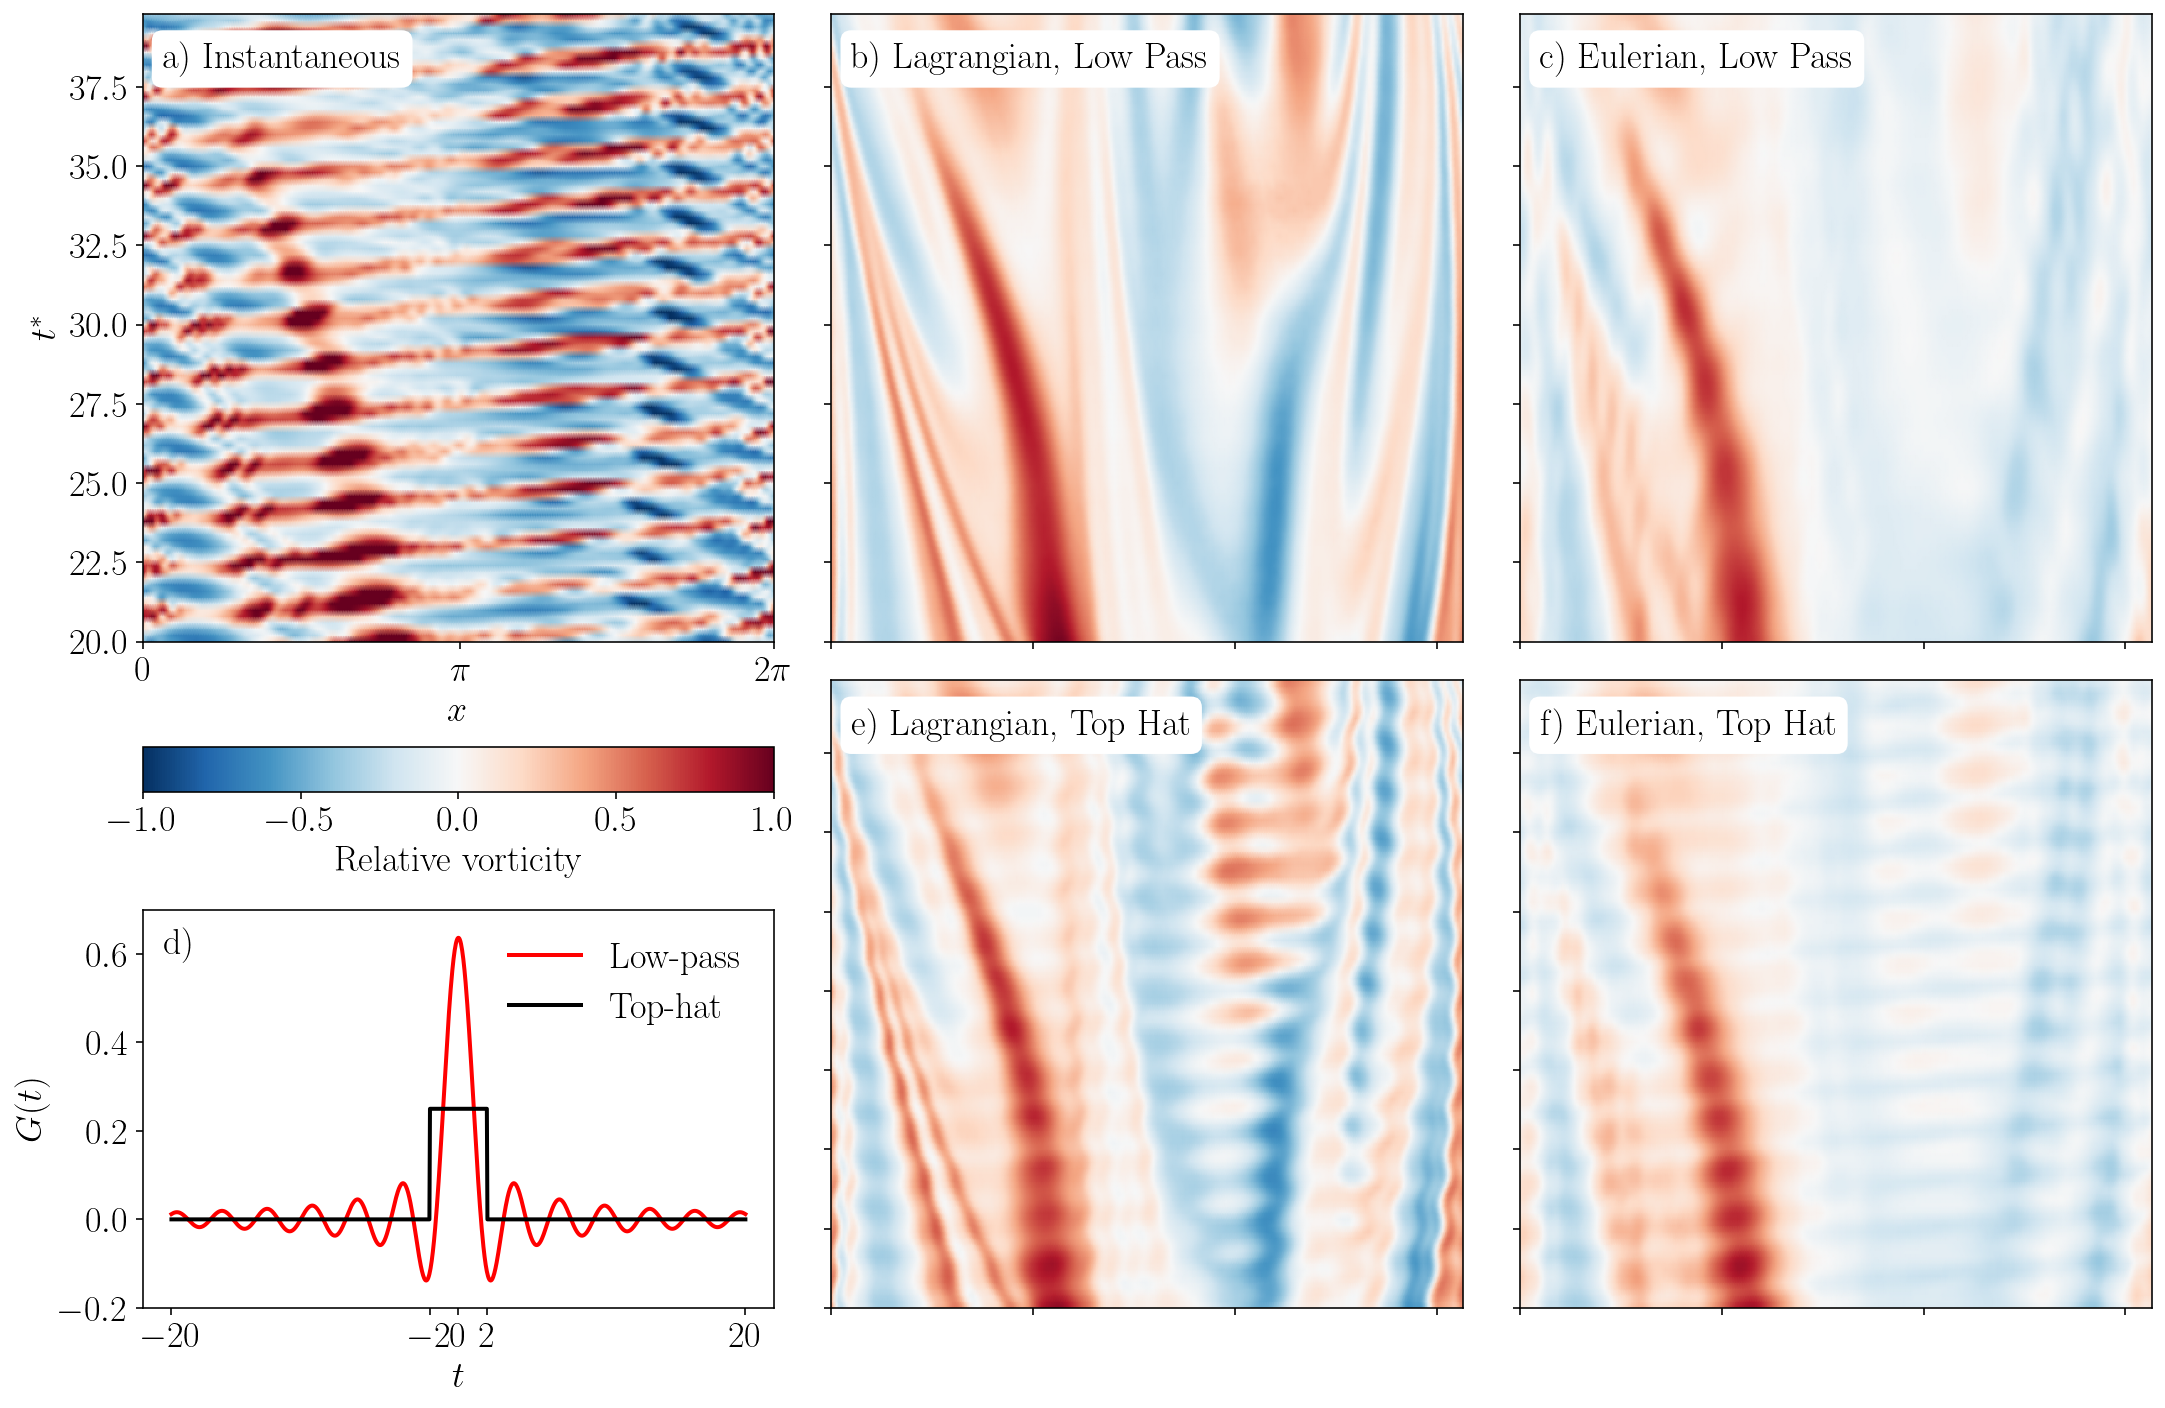

In [5]:
# Initialising figure
fig = plt.figure(figsize = (18,11.9))
ax0 = plt.subplot2grid((48, 12), (0, 0), colspan=4,rowspan=24)
ax1 = plt.subplot2grid((48, 12), (0, 4), colspan=4,rowspan=24)
ax2 = plt.subplot2grid((48, 12), (0, 8), colspan=4,rowspan=24)
ax3 = plt.subplot2grid((48, 12), (24, 4), colspan=4,rowspan=24)
ax4 = plt.subplot2grid((48, 12), (24, 8), colspan=4,rowspan=24)
ax5 = plt.subplot2grid((48, 12), (33, 0), colspan=4,rowspan=15)
axcb = plt.subplot2grid((48, 12), (27, 0), colspan=4,rowspan=2)
axes = [ax0,ax1,ax2,ax3,ax4]


# Plotting
vmin = -1
vmax = 1
p0 = ax0.pcolormesh(ds_lp.x,ds_lp.t,ds_lp.z_inst,vmin = vmin, vmax = vmax,cmap = 'RdBu_r',shading='gouraud')
ax1.pcolormesh(ds_lp.x,ds_lp.t,ds_lp.z_LM_at_mean,vmin = vmin, vmax = vmax,cmap = 'RdBu_r',shading='gouraud')
ax2.pcolormesh(ds_lp.x,ds_lp.t,ds_lp.z_EM,vmin = vmin, vmax = vmax,cmap = 'RdBu_r',shading='gouraud')
ax3.pcolormesh(ds_th.x,ds_th.t,ds_th.z_LM_at_mean,vmin = vmin, vmax = vmax,cmap = 'RdBu_r',shading='gouraud')
ax4.pcolormesh(ds_th.x,ds_th.t,ds_th.z_EM,vmin = vmin, vmax = vmax,cmap = 'RdBu_r',shading='gouraud')
fig.colorbar(p0,cax=axcb,orientation='horizontal',label='Relative vorticity',shrink=0.5)

textposx = 8/256*2*np.pi
textposy = 38.1
bbox=dict(facecolor='white', edgecolor='none', boxstyle='round')
ax0.text(textposx,textposy,'a) Instantaneous',bbox=bbox)
ax1.text(textposx,textposy,'b) Lagrangian, Low Pass',bbox=bbox)
ax2.text(textposx,textposy,'c) Eulerian, Low Pass',bbox=bbox)
ax3.text(textposx,textposy,'e) Lagrangian, Top Hat',bbox=bbox)
ax4.text(textposx,textposy,'f) Eulerian, Top Hat',bbox=bbox)


# Plot weight function panel
t = np.linspace(-20,20,1000)
g_th = np.zeros_like(t)
omega_crit=2
T = 40
g_th[(t < 2) & (t> -2)] = 1/4
g_lp = (np.sin(t*omega_crit)/np.pi/t)
g_lp[(t > T/2) | (t< -T/2)] = 0
ax5.plot(t,g_lp,'r',linewidth=2,label='Low-pass')
ax5.plot(t,g_th,'k',linewidth=2,label='Top-hat')
ax5.legend(loc='upper right',frameon=False)
ax5.text(-20.5,0.6,'d)',bbox=bbox)

# Formatting
aspect = 2*np.pi/20
ax0.set_aspect(aspect,anchor='NW')
ax1.set_aspect(aspect,anchor='NW')
ax2.set_aspect(aspect,anchor='NE')
ax3.set_aspect(aspect,anchor='SW')
ax4.set_aspect(aspect,anchor='SE')

[ax.axes.set_xticklabels([]) for ax in axes];
[ax.axes.set_yticklabels([]) for ax in axes[1:]];
ax0.set_xticks([0,np.pi,2*np.pi-0.03])

labels = ['0','$\pi$','$2\pi$']
ax0.set_xticklabels(labels)
ax0.set_xlabel('$x$')
ax0.set_ylabel('$t^*$')
ax5.set_ylim([-0.2,0.7])
ax5.set_xlabel(r'$t$')
ax5.set_ylabel(r'$G(t)$')
ax5.set_xticks([-20,-2,0,2,20])

plt.subplots_adjust(hspace=0.5,wspace=0.5)
fig.savefig('Figure-3.png',dpi=200,bbox_inches='tight')

As in figure 2, showing the time ($t^*$) evolution of each field at $y = 2.8$.

More data variables are available in the xarray datasets:

In [7]:
ds_lp

<xarray.Dataset>
Dimensions:         (x: 256, t: 100)
Coordinates:
  * x               (x) float64 0.0 0.02454 0.04909 0.07363 ... 6.21 6.234 6.259
  * t               (t) float64 20.0 20.2 20.4 20.6 20.8 ... 39.2 39.4 39.6 39.8
    y               float64 ...
Data variables:
    z_inst          (t, x) float64 -0.3126 -0.5 -0.6376 ... -0.4035 -0.3782
    z_EM            (t, x) float64 0.1638 0.162 0.1552 ... -0.1046 -0.1017
    z_inst_at_end   (t, x) float64 ...
    z_LM_at_mid     (t, x) float64 ...
    z_LM_at_end     (t, x) float64 ...
    Xi31_x          (t, x) float64 ...
    Xi31_y          (t, x) float64 ...
    z_inst_at_mean  (t, x) float64 ...
    z_LM_at_mean    (t, x) float64 0.4263 0.2616 0.05574 ... -0.005384 -0.09303
    Xi32_x          (t, x) float64 ...
    Xi32_y          (t, x) float64 ...
    timestep        (t) int32 ...
Attributes:
    description:  SW GLM solver outputs